In [1]:
import sys
sys.path.append("/home/hugo/projetos-doutorado/Appliance-Energy-Prediction")
import pandas as pd
from pca_fts.PcaWeightedMVFTS import PcaWeightedMVFTS
from pyFTS.benchmarks import Measures
import matplotlib.pyplot as plt
from pyFTS.common import Util
import datetime
import statistics
import math

In [2]:
def sample_first_prows(data, perc=0.75):
    return data.head(int(len(data)*(perc)))

In [3]:
filename = '/home/hugo/projetos-doutorado/Appliance-Energy-Prediction/data/energydata_complete.csv'
data = pd.read_csv(filename)
data.pop('date')
data.pop('rv1')
data.pop('rv2')
data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [4]:
# diff = data.loc[:,'lights':'Tdewpoint']
# diff = diff.diff()
# diff['Appliances'] = data['Appliances']
# data = diff.dropna()

In [5]:
pca_wmvfts = PcaWeightedMVFTS(n_components = 2,
                       endogen_variable = 'Appliances',
                       n_part = 50)

In [6]:
result = {
     "window": [],
     "rmse": [],
     "mape": [],
     "smape": []
}

tam = len(data)
n_windows = 30
windows_length = math.floor(tam / n_windows)
for ct, ttrain, ttest in Util.sliding_window(data, windows_length, 0.75, inc=1):
    if len(ttest) > 0:
        
        print('-' * 20)
        print(f'training window {(ct)}')
        model, pca_reduced_train = pca_wmvfts.run_train_model(ttrain)
        forecast, forecast_self, pca_reduced_test = pca_wmvfts.run_test_model(model,ttest)
        
        print("[{0: %H:%M:%S}]".format(datetime.datetime.now()) + f" getting statistics")
        rmse = Measures.rmse(pca_reduced_test['Appliances'],forecast)
        mape = Measures.mape(pca_reduced_test['Appliances'],forecast)
        smape = Measures.smape(pca_reduced_test['Appliances'],forecast)
        
        result["rmse"].append(rmse)
        result["mape"].append(mape)
        result["smape"].append(smape)
        result["window"].append(ct)
        
measures = pd.DataFrame(result)



--------------------
training window 0
[ 19:24:16] getting statistics
--------------------
training window 657
[ 19:24:18] getting statistics
--------------------
training window 1314
[ 19:24:19] getting statistics
--------------------
training window 1971
[ 19:24:21] getting statistics
--------------------
training window 2628
[ 19:24:22] getting statistics
--------------------
training window 3285
[ 19:24:24] getting statistics
--------------------
training window 3942
[ 19:24:25] getting statistics
--------------------
training window 4599
[ 19:24:26] getting statistics
--------------------
training window 5256
[ 19:24:28] getting statistics
--------------------
training window 5913


/home/hugo/anaconda3/lib/python3.8/site-packages/pyFTS/models/multivariate/mvfts.py:165: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.nansum(mv))


[ 19:24:30] getting statistics
--------------------
training window 6570
[ 19:24:31] getting statistics
--------------------
training window 7227
[ 19:24:33] getting statistics
--------------------
training window 7884
[ 19:24:34] getting statistics
--------------------
training window 8541
[ 19:24:36] getting statistics
--------------------
training window 9198
[ 19:24:38] getting statistics
--------------------
training window 9855
[ 19:24:40] getting statistics
--------------------
training window 10512
[ 19:24:42] getting statistics
--------------------
training window 11169
[ 19:24:43] getting statistics
--------------------
training window 11826
[ 19:24:45] getting statistics
--------------------
training window 12483
[ 19:24:47] getting statistics
--------------------
training window 13140
[ 19:24:48] getting statistics
--------------------
training window 13797
[ 19:24:50] getting statistics
--------------------
training window 14454
[ 19:24:51] getting statistics
-------------

/home/hugo/anaconda3/lib/python3.8/site-packages/pyFTS/models/multivariate/mvfts.py:165: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.nansum(mv))


[ 19:24:53] getting statistics
--------------------
training window 15768
[ 19:24:55] getting statistics
--------------------
training window 16425
[ 19:24:57] getting statistics
--------------------
training window 17082


/home/hugo/anaconda3/lib/python3.8/site-packages/pyFTS/models/multivariate/mvfts.py:165: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.nansum(mv))


[ 19:24:58] getting statistics
--------------------
training window 17739
[ 19:25:00] getting statistics
--------------------
training window 18396
[ 19:25:01] getting statistics
--------------------
training window 19053
[ 19:25:03] getting statistics


In [7]:
measures

,window,rmse,mape,smape
0,0,1.233933,0.454857,0.219828
1,657,12.569413,2.679503,1.179258
2,1314,2.024035,0.354741,0.177193
3,1971,1.998539,1.091660,0.492870
4,2628,5.917889,0.971406,0.419530
5,3285,1.353230,0.539587,0.274205
6,3942,2.983911,1.088990,0.562853
7,4599,9.390997,3.621466,1.480841
8,5256,1.599836,0.624423,0.318716
9,5913,5.036524,3.988094,1.551652


In [8]:
print("Mean: ")
print(statistics.mean(measures['rmse']))
print(statistics.mean(measures['mape']))
print(statistics.mean(measures['smape']))

Mean: 
4.867542345807799
1.7502458053803027
0.7430904765425608


In [9]:
train = sample_first_prows(data,0.75)
test = data.iloc[max(train.index):]
y_test = data.iloc[max(train.index):]['Appliances'].values

In [10]:
pca_wmvfts = PcaWeightedMVFTS(n_components = 2,
                       endogen_variable = 'Appliances',
                       n_part = 50)

In [11]:
model, pca_reduced_train = pca_wmvfts.run_train_model(train)
forecast, forecast_self, pca_reduced_test = pca_wmvfts.run_test_model(model,test)

In [12]:
#model.mvflrg

In [13]:
forecast_1 = model.predict(pca_reduced_test)

In [14]:
Measures.rmse(y_test,forecast)

19.582814616745782

In [15]:
Measures.rmse(forecast_1,y_test)

19.582814616745782

In [16]:
Measures.rmse(y_test,forecast_self)

19.582814616745782

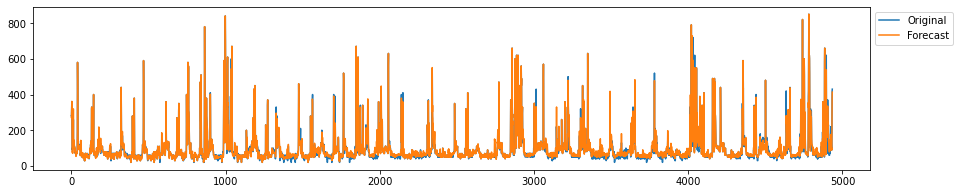

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
ax.plot(y_test, label='Original')
ax.plot(forecast, label='Forecast')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
plt.show()


In [18]:
rmse, mape, u = Measures.get_point_statistics(
    data=pca_reduced_test,
    model=model
)

In [19]:
rmse

66.18

In [20]:
mape

27.09

In [21]:
pca_reduced_test

,x,y,Appliances
0,-0.536451,0.379525,280
1,-0.527063,0.400491,280
2,-0.519460,0.384878,320
3,-0.516230,0.379096,360
4,-0.503028,0.404434,210
...,...,...,...
4930,1.191707,0.317761,100
4931,1.179128,0.312629,90
4932,1.175407,0.296580,270
4933,1.151549,0.282911,420
